# 0.0 Imports

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree as tr
from sklearn import metrics as mt
from sklearn import ensemble as en
from sklearn import linear_model as lm
import numpy as np
from matplotlib import pyplot as plt


import warnings



# 1.0 Load Datasets

In [3]:
# dados treino
X_training = pd.read_csv('C:/Users/rafae/Documents/repos/fundamentos_ml/Projeto_Aluno/Classificacao/X_training.csv')
y_training = pd.read_csv('C:/Users/rafae/Documents/repos/fundamentos_ml/Projeto_Aluno/Classificacao/y_training.csv')

In [4]:
# dados validação
X_val = pd.read_csv('C:/Users/rafae/Documents/repos/fundamentos_ml/Projeto_Aluno/Classificacao/X_validation.csv')
y_val = pd.read_csv('C:/Users/rafae/Documents/repos/fundamentos_ml/Projeto_Aluno/Classificacao/y_validation.csv')

In [5]:
# dados teste
X_test = pd.read_csv('C:/Users/rafae/Documents/repos/fundamentos_ml/Projeto_Aluno/Classificacao/X_test.csv')
y_test = pd.read_csv('C:/Users/rafae/Documents/repos/fundamentos_ml/Projeto_Aluno/Classificacao/y_test.csv')

# 2.0 Model training

## 2.1 KNN

### Dados Treino

In [6]:
k_neighbors = np.arange(1, 7, 2)
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []


for i in k_neighbors:
    print(f'k_number: {i}')
    warnings.filterwarnings("ignore")
    # model definition
    model = KNeighborsClassifier(n_neighbors=i)

    # model training
    model.fit(X_training, y_training)

    # predict
    y_pred = model.predict(X_training.values)

    # accuracy
    accuracy = mt.accuracy_score(y_training, y_pred)
    print(f'Accuracy Score: {accuracy}')
    accuracy_list.append(accuracy)

    # precision 
    precision = mt.precision_score(y_training, y_pred)
    print(f'Precision Score: {precision}')
    precision_list.append(precision)

    # recall
    recall = mt.recall_score(y_training, y_pred)
    print(f'Recall Score: {recall}')
    recall_list.append(recall)

    # f1-score
    f1_score = mt.f1_score(y_training, y_pred)
    print(f'F1-Score: {f1_score}')
    f1_score_list.append(f1_score)

k_number: 1
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1-Score: 1.0
k_number: 3
Accuracy Score: 0.8321864441839619
Precision Score: 0.8120079059067492
Recall Score: 0.7974099529082347
F1-Score: 0.804642725273314
k_number: 5
Accuracy Score: 0.7815624353582018
Precision Score: 0.7558933613500558
Recall Score: 0.7325633193330788
F1-Score: 0.744045503021685


In [7]:
mt.accuracy_score(y_training, y_pred)

0.7815624353582018

In [8]:
Knn = {'Algoritmo': 'KNN', 'Acurácia': [round(accuracy_list[2],3)], 'Precision': [round(precision_list[2],3)], 'Recall': [round(recall_list[2],3)], 'F1-Score': [round(f1_score_list[2],3)]}
df_train = pd.DataFrame(Knn)
df_train

,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,KNN,0.782,0.756,0.733,0.744


### Dados Validação

In [9]:
# melhor número de k-neighbors é 5 
k = 5
print(f'K-Number: {k}')
# model definition
model = KNeighborsClassifier(n_neighbors=5)

# model training
model.fit(X_training, y_training)

# predict
y_pred_val = model.predict(X_val.values)

# accuracy
accuracy = mt.accuracy_score(y_val, y_pred_val)
print(f'Accuracy Score: {round(accuracy,3)}')
#accuracy_list.append(accuracy)

# precision 
precision = mt.precision_score(y_val, y_pred_val)
print(f'Precision Score: {round(precision,3)}')
#precision_list.append(precision)

# recall
recall = mt.recall_score(y_val, y_pred_val)
print(f'Recall Score: {round(recall,3)}')
#recall_list.append(recall)

# f1-score
f1_score = mt.f1_score(y_val, y_pred_val)
print(f'F1-Score: {round(f1_score,3)}')
#f1_score_list.append(f1_score)

df_val = {'Algoritmo': 'KNN', 'Acurácia': round(accuracy,3), 'Precision': round(precision,3), 'Recall': round(recall,3), 'F1-Score': round(f1_score,3)}
df_val = pd.DataFrame(data=df_val, index=[0])
df_val

K-Number: 5
Accuracy Score: 0.676
Precision Score: 0.632
Recall Score: 0.603
F1-Score: 0.617


,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,KNN,0.676,0.632,0.603,0.617


### Dados Teste

In [10]:
# melhor número de k-neighbors é 5 
k = 5
print(f'K-Number: {k}')
# model definition
model = KNeighborsClassifier(n_neighbors=5)

# model training
model.fit(pd.concat([X_training, X_val]), pd.concat([y_training, y_val]))

# predict
y_pred_test = model.predict(X_test.values)

# accuracy
accuracy = mt.accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score: {round(accuracy,3)}')
#accuracy_list.append(accuracy)

# precision 
precision = mt.precision_score(y_test, y_pred_test)
print(f'Precision Score: {round(precision,3)}')
#precision_list.append(precision)

# recall
recall = mt.recall_score(y_test, y_pred_test)
print(f'Recall Score: {round(recall,3)}')
#recall_list.append(recall)

# f1-score
f1_score = mt.f1_score(y_test, y_pred_test)
print(f'F1-Score: {round(f1_score,3)}')
#f1_score_list.append(f1_score)

df_test = {'Algoritmo': 'KNN', 'Acurácia': round(accuracy,3), 'Precision': round(precision,3), 'Recall': round(recall,3), 'F1-Score': round(f1_score,3)}
df_test= pd.DataFrame(data=df_test, index=[0])
df_test

K-Number: 5
Accuracy Score: 0.685
Precision Score: 0.646
Recall Score: 0.624
F1-Score: 0.635


,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,KNN,0.685,0.646,0.624,0.635


## 2.2 Decision Tree

### Dados Treino

In [11]:
#k_neighbors = np.arange(1, 7, 2)
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
max_depth = np.arange(2, 51, 1)


for i in max_depth:
    print(f'Max-Depth: {i}')
    warnings.filterwarnings("ignore")
    # model definition
    model = tr.DecisionTreeClassifier(max_depth=i)

    # model training
    model.fit(X_training, y_training)

    # predict
    y_pred = model.predict(X_training.values)

    # accuracy
    accuracy = mt.accuracy_score(y_training, y_pred)
    print(f'Accuracy Score: {accuracy}')
    accuracy_list.append(accuracy)

    # precision 
    precision = mt.precision_score(y_training, y_pred)
    print(f'Precision Score: {precision}')
    precision_list.append(precision)

    # recall
    recall = mt.recall_score(y_training, y_pred)
    print(f'Recall Score: {recall}')
    recall_list.append(recall)

    # f1-score
    f1_score = mt.f1_score(y_training, y_pred)
    print(f'F1-Score: {f1_score}')
    f1_score_list.append(f1_score)

print(mt.classification_report(y_training, y_pred))

Max-Depth: 2
Accuracy Score: 0.8570916362131973
Precision Score: 0.8297485989793683
Recall Score: 0.8432926053200968
F1-Score: 0.836465779797693
Max-Depth: 3
Accuracy Score: 0.8841618975384403
Precision Score: 0.8395058088105207
Recall Score: 0.9059119256713758
F1-Score: 0.8714456245600074
Max-Depth: 4
Accuracy Score: 0.8934427359856582
Precision Score: 0.9233077335238435
Recall Score: 0.8224513172966781
F1-Score: 0.8699661747134947
Max-Depth: 5
Accuracy Score: 0.9067641177687376
Precision Score: 0.9077324870243645
Recall Score: 0.8736795214458445
F1-Score: 0.890380530829969
Max-Depth: 6
Accuracy Score: 0.9228159691098393
Precision Score: 0.9018637792090607
Recall Score: 0.9222667684866998
F1-Score: 0.9119511696320417
Max-Depth: 7
Accuracy Score: 0.9344825208577535
Precision Score: 0.9526589065734551
Recall Score: 0.8932162402952781
F1-Score: 0.9219804581656952
Max-Depth: 8
Accuracy Score: 0.9427153002827001
Precision Score: 0.9503632760898283
Recall Score: 0.9156484663357516
F1-Score:

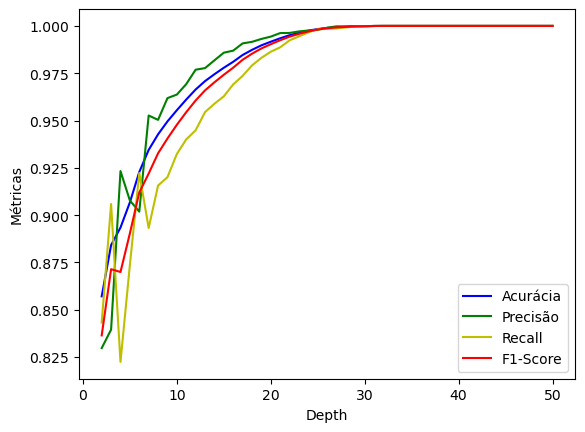

In [12]:
plt.plot(max_depth, accuracy_list, 'b', label='Acurácia')
plt.plot(max_depth, precision_list, 'g', label='Precisão')
plt.plot(max_depth, recall_list, 'y', label='Recall')
plt.plot(max_depth, f1_score_list, 'r', label='F1-Score')
plt.xlabel('Depth')
plt.ylabel('Métricas')
plt.legend()

In [13]:
# model definition
model = tr.DecisionTreeClassifier(max_depth=29)

# model training
model.fit(X_training, y_training)

# predict
y_pred = model.predict(X_training.values)

# accuracy
accuracy = mt.accuracy_score(y_training, y_pred)
print(f'Accuracy Score: {accuracy}')
#accuracy_list.append(accuracy)

# precision 
precision = mt.precision_score(y_training, y_pred)
print(f'Precision Score: {precision}')
#precision_list.append(precision)

# recall
recall = mt.recall_score(y_training, y_pred)
print(f'Recall Score: {recall}')
#recall_list.append(recall)

# f1-score
f1_score = mt.f1_score(y_training, y_pred)
print(f'F1-Score: {f1_score}')
#f1_score_list.append(f1_score)
df_tree_classifier_train = {'Algoritmo' : 'Decision Tree Classifier','Acurácia': round(accuracy,3), 'Precision': round(precision,3), 'Recall': round(recall,3), 'F1-Score': round(f1_score, 3)}
df_tree_classifier_train  = pd.DataFrame(data=df_tree_classifier_train,index=[0])
df_tree_classifier_train

Accuracy Score: 0.9997931462456043
Precision Score: 0.9998726966041819
Recall Score: 0.999649993636248
F1-Score: 0.9997613327181021


,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,Decision Tree Classifier,1.0,1.0,1.0,1.0


### Dados Validação

In [14]:
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
max_depth = np.arange(2, 51, 1)


for i in max_depth:
    print(f'Max-Depth: {i}')
    warnings.filterwarnings("ignore")
    # model definition
    model = tr.DecisionTreeClassifier(max_depth=i)

    # model training
    model.fit(X_training, y_training)

    # predict
    y_pred_val = model.predict(X_val.values)

    # accuracy
    accuracy = mt.accuracy_score(y_val, y_pred_val)
    print(f'Accuracy Score: {accuracy}')
    accuracy_list.append(accuracy)

    # precision 
    precision = mt.precision_score(y_val, y_pred_val)
    print(f'Precision Score: {precision}')
    precision_list.append(precision)

    # recall
    recall = mt.recall_score(y_val, y_pred_val)
    print(f'Recall Score: {recall}')
    recall_list.append(recall)

    # f1-score
    f1_score = mt.f1_score(y_val, y_pred_val)
    print(f'F1-Score: {f1_score}')
    f1_score_list.append(f1_score)



Max-Depth: 2
Accuracy Score: 0.8564947392129734
Precision Score: 0.8300241775954282
Recall Score: 0.8411166382062514
F1-Score: 0.8355335939228558
Max-Depth: 3
Accuracy Score: 0.885453199909907
Precision Score: 0.8403984884919272
Recall Score: 0.9081594773182864
F1-Score: 0.872966029117899
Max-Depth: 4
Accuracy Score: 0.8934650407027254
Precision Score: 0.9241690329046267
Recall Score: 0.8215903185091692
F1-Score: 0.8698659749243406
Max-Depth: 5
Accuracy Score: 0.9066894044209917
Precision Score: 0.9065312716362797
Recall Score: 0.8748979137278194
F1-Score: 0.8904337312981714
Max-Depth: 6
Accuracy Score: 0.9225843817368641
Precision Score: 0.9001084990958409
Recall Score: 0.9238993243744895
F1-Score: 0.9118487579687843
Max-Depth: 7
Accuracy Score: 0.933685125004022
Precision Score: 0.9526265672115537
Recall Score: 0.8913059618382954
F1-Score: 0.9209466456982855
Max-Depth: 8
Accuracy Score: 0.9399594581550242
Precision Score: 0.9477502508296674
Recall Score: 0.9117232162744079
F1-Score: 

In [15]:
# model definition
model = tr.DecisionTreeClassifier(max_depth=26)

# model training
model.fit(X_training, y_training)

# predict
y_pred_val = model.predict(X_val.values)

# accuracy
accuracy = mt.accuracy_score(y_val, y_pred_val)
print(f'Accuracy Score: {accuracy}')
#accuracy_list.append(accuracy)

# precision 
precision = mt.precision_score(y_val, y_pred_val)
print(f'Precision Score: {precision}')
#precision_list.append(precision)

# recall
recall = mt.recall_score(y_val, y_pred_val)
print(f'Recall Score: {recall}')
#recall_list.append(recall)

# f1-score
f1_score = mt.f1_score(y_val, y_pred_val)
print(f'F1-Score: {f1_score}')
#f1_score_list.append(f1_score)

df_tree_classifier_val = {'Algoritmo' : 'Decision Tree Classifier','Acurácia': round(accuracy,3), 'Precision': round(precision,3), 'Recall': round(recall,3), 'F1-Score': round(f1_score, 3)}
df_tree_classifier_val  = pd.DataFrame(data=df_tree_classifier_val,index=[0])
df_tree_classifier_val

Accuracy Score: 0.9471347211943756
Precision Score: 0.9381298162418494
Recall Score: 0.940010394238622
F1-Score: 0.939069163730762


,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.947,0.938,0.94,0.939


### Dados Teste

In [16]:
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
max_depth = np.arange(2, 40, 1)


for i in max_depth:
    print(f'Max-Depth: {i}')
    warnings.filterwarnings("ignore")
    # model definition
    model = tr.DecisionTreeClassifier(max_depth=i)

    # model training
    model.fit(pd.concat([X_training, X_val]), pd.concat([y_training, y_val]))

    # predict
    y_pred_test = model.predict(X_test.values)

    # accuracy
    accuracy = mt.accuracy_score(y_test, y_pred_test)
    print(f'Accuracy Score: {accuracy}')
    accuracy_list.append(accuracy)

    # precision 
    precision = mt.precision_score(y_test, y_pred_test)
    print(f'Precision Score: {precision}')
    precision_list.append(precision)

    # recall
    recall = mt.recall_score(y_test, y_pred_test)
    print(f'Recall Score: {recall}')
    recall_list.append(recall)

    # f1-score
    f1_score = mt.f1_score(y_test, y_pred_test)
    print(f'F1-Score: {f1_score}')
    f1_score_list.append(f1_score)

Max-Depth: 2
Accuracy Score: 0.860425597651875
Precision Score: 0.8588758218353552
Recall Score: 0.8161020677518698
F1-Score: 0.8369427901100884
Max-Depth: 3
Accuracy Score: 0.8838682269339204
Precision Score: 0.840087890625
Recall Score: 0.908315002199736
F1-Score: 0.872870249017038
Max-Depth: 4
Accuracy Score: 0.8881164793573553
Precision Score: 0.9390294483616757
Recall Score: 0.7968323801143863
F1-Score: 0.8621067161692608
Max-Depth: 5
Accuracy Score: 0.9047619047619048
Precision Score: 0.9029249298197953
Recall Score: 0.8773427188737352
F1-Score: 0.8899500178507677
Max-Depth: 6
Accuracy Score: 0.9195921677673502
Precision Score: 0.9016180669723977
Recall Score: 0.9168499780026397
F1-Score: 0.9091702294738679
Max-Depth: 7
Accuracy Score: 0.930637624068281
Precision Score: 0.9456086430101518
Recall Score: 0.8933567971843379
F1-Score: 0.9187403854854764
Max-Depth: 8
Accuracy Score: 0.9380527555710038
Precision Score: 0.9431580858984836
Recall Score: 0.9139463264408271
F1-Score: 0.928

In [17]:
# model definition
model = tr.DecisionTreeClassifier(max_depth=25)

# model training
model.fit(pd.concat([X_training, X_val]), pd.concat([y_training, y_val]))

# predict
y_pred_test = model.predict(X_test.values)

# accuracy
accuracy = mt.accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score: {accuracy}')
#accuracy_list.append(accuracy)

# precision 
precision = mt.precision_score(y_test, y_pred_test)
print(f'Precision Score: {precision}')
#precision_list.append(precision)

# recall
recall = mt.recall_score(y_test, y_pred_test)
print(f'Recall Score: {recall}')
#recall_list.append(recall)

# f1-score
f1_score = mt.f1_score(y_test, y_pred_test)
print(f'F1-Score: {f1_score}')
#f1_score_list.append(f1_score)

df_tree_classifier_test = {'Algoritmo' : 'Decision Tree Classifier','Acurácia': round(accuracy,3), 'Precision': round(precision,3), 'Recall': round(recall,3), 'F1-Score': round(f1_score, 3)}
df_tree_classifier_test  = pd.DataFrame(data=df_tree_classifier_test,index=[0])
df_tree_classifier_test

Accuracy Score: 0.9475533928088673
Precision Score: 0.9398681318681319
Recall Score: 0.9406951165860097
F1-Score: 0.9402814423922603


,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.948,0.94,0.941,0.94


## 2.3 Random Forest

### Dados Treino

In [18]:
acc_list = []
prec_list = []
rec_list = []
f1_score_forest_list = []
tree_number = np.arange(10, 101, 10)

for i in tree_number:
    print(f'Tree Number: {i}')
    # model definition
    forest = en.RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=0)

    # model training
    forest.fit(X_training,y_training)

    # predict

    yhat_forest = forest.predict(X_training)

    # acurácia
    acc_forest = mt.accuracy_score(y_training, yhat_forest)
    print(f'Accuracy: {round(acc_forest,3)}')
    acc_list.append(acc_forest)

    # precision
    prec_forest = mt.precision_score(y_training, yhat_forest)
    print(f'Precision: {round(prec_forest,3)}')
    prec_list.append(prec_forest)

    # recall
    recall_forest = mt.recall_score(y_training, yhat_forest)
    print(f'Recall: {round(recall_forest,3)}')
    rec_list.append(recall_forest)

    # f1-score
    f1_score_forest = mt.f1_score(y_training, yhat_forest)
    print(f'F1-Score: {round(f1_score_forest,3)}')
    f1_score_forest_list.append(f1_score_forest)


Tree Number: 10
Accuracy: 0.997
Precision: 0.999
Recall: 0.994
F1-Score: 0.997
Tree Number: 20
Accuracy: 0.999
Precision: 1.0
Recall: 0.998
F1-Score: 0.999
Tree Number: 30
Accuracy: 1.0
Precision: 1.0
Recall: 0.999
F1-Score: 1.0
Tree Number: 40
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Tree Number: 50
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Tree Number: 60
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Tree Number: 70
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Tree Number: 80
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Tree Number: 90
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Tree Number: 100
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [19]:
# model definition
forest = en.RandomForestClassifier(n_estimators=30, n_jobs=-1)

# model training
forest.fit(X_training,y_training)

# predict

yhat_forest = forest.predict(X_training)

# acurácia
acc_forest = mt.accuracy_score(y_training, yhat_forest)
print(f'Accuracy: {round(acc_forest,3)}')

# precision
prec_forest = mt.precision_score(y_training, yhat_forest)
print(f'Precision: {round(prec_forest,3)}')

# recall
recall_forest = mt.recall_score(y_training, yhat_forest)
print(f'Recall: {round(recall_forest,3)}')

# f1-score
f1_score_forest = mt.f1_score(y_training, yhat_forest)
print(f'F1-Score: {round(f1_score_forest,3)}')

print('\n')

df_forest_train = {'Algoritmo': 'Random Forest Classifier', 'Acurácia': round(acc_forest,3), 'Precision': round(prec_forest,3), 'Recall': round(recall_forest,3), 'F1-Score': round(f1_score_forest,3)}
df_forest_train = pd.DataFrame(data=df_forest_train, index=[0])


Accuracy: 1.0
Precision: 1.0
Recall: 0.999
F1-Score: 1.0




In [20]:
df_forest_train

,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,Random Forest Classifier,1.0,1.0,0.999,1.0


### Dados Validação

In [21]:
acc_list = []
prec_list = []
rec_list = []
f1_score_forest_list = []
tree_number = np.arange(10, 101, 10)

for i in tree_number:
    print(f'Tree Number: {i}')
    # model definition
    forest = en.RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=0)

    # model training
    forest.fit(X_training,y_training)

    # predict

    yhat_forest_val = forest.predict(X_val)

    # acurácia
    acc_forest = mt.accuracy_score(y_val, yhat_forest_val)
    print(f'Accuracy: {round(acc_forest,3)}')
    acc_list.append(acc_forest)

    # precision
    prec_forest = mt.precision_score(y_val, yhat_forest_val)
    print(f'Precision: {round(prec_forest,3)}')
    prec_list.append(prec_forest)

    # recall
    recall_forest = mt.recall_score(y_val, yhat_forest_val)
    print(f'Recall: {round(recall_forest,3)}')
    rec_list.append(recall_forest)

    # f1-score
    f1_score_forest = mt.f1_score(y_val, yhat_forest_val)
    print(f'F1-Score: {round(f1_score_forest,3)}')
    f1_score_forest_list.append(f1_score_forest)

Tree Number: 10


Accuracy: 0.958
Precision: 0.97
Recall: 0.933
F1-Score: 0.951
Tree Number: 20
Accuracy: 0.961
Precision: 0.972
Recall: 0.938
F1-Score: 0.955
Tree Number: 30
Accuracy: 0.962
Precision: 0.973
Recall: 0.94
F1-Score: 0.956
Tree Number: 40
Accuracy: 0.963
Precision: 0.972
Recall: 0.942
F1-Score: 0.957
Tree Number: 50
Accuracy: 0.964
Precision: 0.974
Recall: 0.942
F1-Score: 0.958
Tree Number: 60
Accuracy: 0.964
Precision: 0.974
Recall: 0.943
F1-Score: 0.958
Tree Number: 70
Accuracy: 0.964
Precision: 0.973
Recall: 0.943
F1-Score: 0.958
Tree Number: 80
Accuracy: 0.965
Precision: 0.974
Recall: 0.944
F1-Score: 0.959
Tree Number: 90
Accuracy: 0.965
Precision: 0.974
Recall: 0.943
F1-Score: 0.959
Tree Number: 100
Accuracy: 0.965
Precision: 0.974
Recall: 0.944
F1-Score: 0.958


In [22]:
# model definition
forest = en.RandomForestClassifier(n_estimators=100, n_jobs=-1)

# model training
forest.fit(X_training,y_training)

# predict

yhat_forest_val = forest.predict(X_val)

# acurácia
acc_forest_val = mt.accuracy_score(y_val, yhat_forest_val)
print(f'Accuracy: {round(acc_forest,3)}')

# precision
prec_forest_val = mt.precision_score(y_val, yhat_forest_val)
print(f'Precision: {round(prec_forest,3)}')

# recall
recall_forest_val = mt.recall_score(y_val, yhat_forest_val)
print(f'Recall: {round(recall_forest,3)}')

# f1-score
f1_score_forest_val = mt.f1_score(y_val, yhat_forest_val)
print(f'F1-Score: {round(f1_score_forest,3)}')

print('\n')

df_forest_val = {'Algoritmo': 'Random Forest Classifier', 'Acurácia': round(acc_forest_val,3), 'Precision': round(prec_forest_val,3), 'Recall': round(recall_forest_val,3), 'F1-Score': round(f1_score_forest_val,3)}
df_forest_val = pd.DataFrame(data=df_forest_val, index=[0])

Accuracy: 0.965
Precision: 0.974
Recall: 0.944
F1-Score: 0.958




In [23]:
df_forest_val

,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,Random Forest Classifier,0.964,0.974,0.944,0.958


### Dados de teste

In [24]:
acc_list = []
prec_list = []
rec_list = []
f1_score_forest_list = []
tree_number = np.arange(10, 131, 10)

for i in tree_number:
    print(f'Tree Number: {i}')
    warnings.filterwarnings("ignore")
    # model definition
    forest = en.RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=0)

    # model training
    forest.fit(pd.concat([X_training,X_val]), pd.concat([y_training, y_val]))

    # predict

    yhat_forest_test = forest.predict(X_test)

    # acurácia
    acc_forest = mt.accuracy_score(y_test, yhat_forest_test)
    print(f'Accuracy: {round(acc_forest,3)}')
    acc_list.append(acc_forest)

    # precision
    prec_forest = mt.precision_score(y_test, yhat_forest_test)
    print(f'Precision: {round(prec_forest,3)}')
    prec_list.append(prec_forest)

    # recall
    recall_forest = mt.recall_score(y_test, yhat_forest_test)
    print(f'Recall: {round(recall_forest,3)}')
    rec_list.append(recall_forest)

    # f1-score
    f1_score_forest = mt.f1_score(y_test, yhat_forest_test)
    print(f'F1-Score: {round(f1_score_forest,3)}')
    f1_score_forest_list.append(f1_score_forest)
    print('\n')

Tree Number: 10


Accuracy: 0.961
Precision: 0.972
Recall: 0.937
F1-Score: 0.954


Tree Number: 20
Accuracy: 0.964
Precision: 0.973
Recall: 0.943
F1-Score: 0.958


Tree Number: 30
Accuracy: 0.964
Precision: 0.973
Recall: 0.944
F1-Score: 0.958


Tree Number: 40
Accuracy: 0.964
Precision: 0.973
Recall: 0.945
F1-Score: 0.958


Tree Number: 50
Accuracy: 0.964
Precision: 0.973
Recall: 0.944
F1-Score: 0.958


Tree Number: 60
Accuracy: 0.964
Precision: 0.973
Recall: 0.944
F1-Score: 0.958


Tree Number: 70
Accuracy: 0.964
Precision: 0.973
Recall: 0.945
F1-Score: 0.959


Tree Number: 80
Accuracy: 0.965
Precision: 0.974
Recall: 0.945
F1-Score: 0.959


Tree Number: 90
Accuracy: 0.965
Precision: 0.974
Recall: 0.945
F1-Score: 0.959


Tree Number: 100
Accuracy: 0.965
Precision: 0.974
Recall: 0.945
F1-Score: 0.959


Tree Number: 110
Accuracy: 0.964
Precision: 0.973
Recall: 0.945
F1-Score: 0.959


Tree Number: 120
Accuracy: 0.965
Precision: 0.974
Recall: 0.945
F1-Score: 0.959


Tree Number: 130
Accuracy: 0.965
Precisio

In [25]:
# model definition
forest = en.RandomForestClassifier(n_estimators=80, n_jobs=-1)

# model training
forest.fit(pd.concat([X_training, X_val]), pd.concat([y_training, y_val]))

# predict

yhat_forest_test = forest.predict(X_test)

# acurácia
acc_forest_test = mt.accuracy_score(y_test, yhat_forest_test)
print(f'Accuracy: {round(acc_forest_test,3)}')

# precision
prec_forest_test = mt.precision_score(y_test, yhat_forest_test)
print(f'Precision: {round(prec_forest_test,3)}')

# recall
recall_forest_test = mt.recall_score(y_test, yhat_forest_test)
print(f'Recall: {round(recall_forest_test,3)}')

# f1-score
f1_score_forest_test = mt.f1_score(y_test, yhat_forest_test)
print(f'F1-Score: {round(f1_score_forest_test,3)}')

print('\n')

df_forest_test = {'Algoritmo': 'Random Forest Classifier', 'Acurácia': round(acc_forest_test,3), 'Precision': round(prec_forest_test,3), 'Recall': round(recall_forest_test,3), 'F1-Score': round(f1_score_forest_test,3)}
df_forest_test = pd.DataFrame(data=df_forest_test, index=[0])

df_forest_test

Accuracy: 0.965
Precision: 0.973
Recall: 0.946
F1-Score: 0.96




,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,Random Forest Classifier,0.965,0.973,0.946,0.96


## 2.4 Logistic Regression

### Dados Treino

In [26]:
model = lm.LogisticRegression()

model.fit(X_training, y_training)


yhat_lm = model.predict(X_training)

# acurácia
acc_lm = mt.accuracy_score(y_training, yhat_lm)

# precision
prec_lm = mt.precision_score(y_training, yhat_lm)

# recall
rec_lm = mt.recall_score(y_training, yhat_lm)

# f1_score
f1_score_lm = mt.f1_score(y_training, yhat_lm)


df_lm_train = {'Algoritmo': 'Logistic Regression', 'Acurácia': round(acc_lm,3), 'Precision': round(prec_lm,3), 'Recall': round(rec_lm,3), 'F1-Score': round(f1_score_lm,3)}
df_lm_train = pd.DataFrame(data = df_lm_train, index=[0])
df_lm_train


,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,Logistic Regression,0.567,0.0,0.0,0.0


### Dados Validação

In [27]:
model = lm.LogisticRegression()

model.fit(X_training, y_training)


yhat_lm_val = model.predict(X_val)

# acurácia
acc_lm_val = mt.accuracy_score(y_val, yhat_lm_val)

# precision
prec_lm_val = mt.precision_score(y_val, yhat_lm_val)

# recall
rec_lm_val = mt.recall_score(y_val, yhat_lm_val)

# f1_score
f1_score_lm_val = mt.f1_score(y_val, yhat_lm_val)


df_lm_val = {'Algoritmo': 'Logistic Regression', 'Acurácia': round(acc_lm_val,3), 'Precision': round(prec_lm_val,3), 'Recall': round(rec_lm_val,3), 'F1-Score': round(f1_score_lm_val,3)}
df_lm_val = pd.DataFrame(data = df_lm_val, index=[0])
df_lm_val

,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,Logistic Regression,0.567,0.0,0.0,0.0


### Dados Teste

In [28]:
model = lm.LogisticRegression(solver='newton-cholesky', n_jobs=-1)

model.fit(pd.concat([X_training, X_val]), pd.concat([y_training, y_val]))


yhat_lm_test = model.predict(X_test)

# acurácia
acc_lm_test = mt.accuracy_score(y_test, yhat_lm_test)

# precision
prec_lm_test = mt.precision_score(y_test, yhat_lm_test)

# recall
rec_lm_test = mt.recall_score(y_test, yhat_lm_test)

# f1_score
f1_score_lm_test = mt.f1_score(y_test, yhat_lm_test)


df_lm_test = {'Algoritmo': 'Logistic Regression', 'Acurácia': round(acc_lm_test,3), 'Precision': round(prec_lm_test,3), 'Recall': round(rec_lm_test,3), 'F1-Score': round(f1_score_lm_test,3)}
df_lm_test = pd.DataFrame(data = df_lm_test, index=[0])
df_lm_test

,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,Logistic Regression,0.872,0.868,0.835,0.851


# Final Classification Report

### Dados Treino

In [29]:
df_final_train = pd.concat([df_train,df_tree_classifier_train,df_forest_train,df_lm_train]).reset_index(drop=True)
df_final_train

,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,KNN,0.782,0.756,0.733,0.744
1,Decision Tree Classifier,1.000,1.000,1.000,1.000
2,Random Forest Classifier,1.000,1.000,0.999,1.000
3,Logistic Regression,0.567,0.000,0.000,0.000


### Dados Validação

In [30]:
df_final_val = pd.concat([df_val,df_tree_classifier_val,df_forest_val,df_lm_val]).reset_index(drop=True)
df_final_val

,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,KNN,0.676,0.632,0.603,0.617
1,Decision Tree Classifier,0.947,0.938,0.940,0.939
2,Random Forest Classifier,0.964,0.974,0.944,0.958
3,Logistic Regression,0.567,0.000,0.000,0.000


### Dados Teste

In [31]:
df_final_test = pd.concat([df_test,df_tree_classifier_test,df_forest_test,df_lm_test]).reset_index(drop=True)
df_final_test

,Algoritmo,Acurácia,Precision,Recall,F1-Score
0,KNN,0.685,0.646,0.624,0.635
1,Decision Tree Classifier,0.948,0.940,0.941,0.940
2,Random Forest Classifier,0.965,0.973,0.946,0.960
3,Logistic Regression,0.872,0.868,0.835,0.851
